# Keplerian Orbit

The following equation describes the motion of a body in orbit around a central body where gravity is the only force involved. This equation will hold true for any stably orbiting mass subject only to first-order gravitational forces. An orbit balanced only by first order gravity is known as a Keplerian orbit. The angular velocity $\omega$ for a Keplerian orbit is dependent on the mass of the central body M (the body being orbited e.g. the corotating region of a synestia) and how much distance, r, there is between the center of the orbiting body and the center of the orbited body.

$$\omega^2 r - \frac{GM}{r^2} = 0$$

The gravitional force of the central body on the moonlet is much greater when the orbital radius (r) of the moonlet is smaller. To avoid impacting the central body at smaller orbital radii, and conserve the moonlet's angular velocity, the moonlet's linear velocity must increase so that the distance the moonlet travels inwards as it is pulled towards the central body is minimal. In fact, a moonlet is always moving towards the central body, but because of its perpendicular linear motion, it maintains a given distance away from the central body.

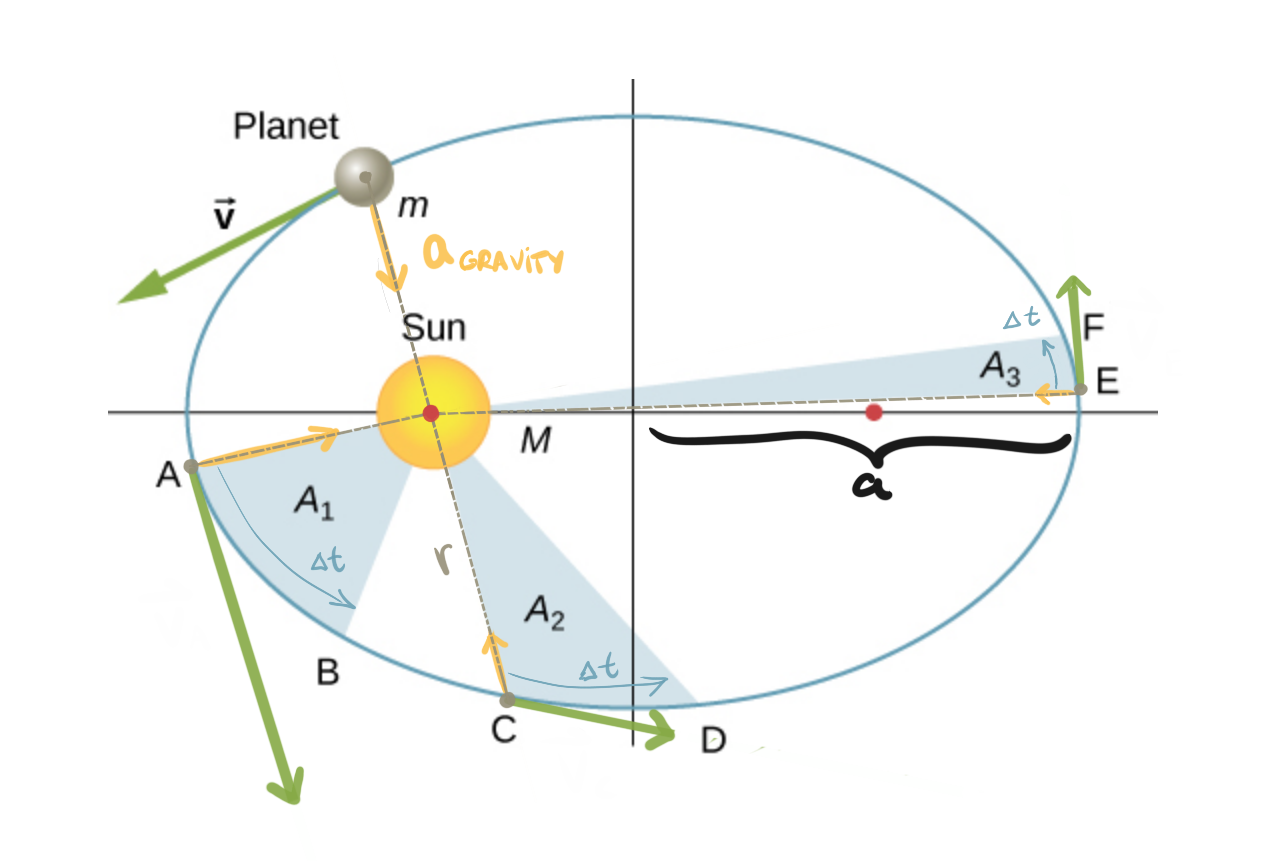

Credit: adapted from Figure 13.20 from 13.5 Kepler's Laws of Planetary Motion, University Physics Vol. 1, OpenStax https://openstax.org/books/university-physics-volume-1/pages/13-5-keplers-laws-of-planetary-motion

A given moonlet in a Keplerian orbit will travel at an angular velocity $\omega = v / r$ that determines how much the moonlet will sweep through its orbit (how wide of an angle). This sweep can be thought of as an area of the orbit (A$_i$ in the figure above), and for a given length of time dt, the moonlet will always sweep through the same amount of area. If the moonlet is close to the orbited body (small r, ex. at point A), then during the time interval dt, the moonlet will sweep through a wide angle with a high angular velocity. Conversely, if the moonlet is far from the orbited body (large r, ex. point E), then during the same time interval, the moonlet will sweep through a small angle at a low angular velocity. 

A circular orbit is a Keplerian orbit with zero eccentricity. This means the path traced by the orbiting body is a circle. If the eccentricity of a Keplerian orbit is greater than zero but less than one, the orbital path becomes an ellipse and no longer follows a circular orbit. The figure above shows an elliptial orbit.

Below is an interactive plot of what a Keplerian orbit should look like for a moonlet (dot) orbiting an Earth-mass body (star). Feel free to play with the semi-major axis (half the distance between the farthest parts of the orbit, a in the figure above), inclination (how rotated the orbital plane with comparison to the midplane), and eccentricity of the moonlet's orbit and see how it affects the moonlet's trajectory. Inclination is in radians, where 0&deg; is 0 radians and 180&deg; is $\pi$ radians. To convert from radians to degrees, multiply the number in radians by 180/$\pi$.

In [2]:
import numpy as np
import math
from ipywidgets import *
import rebound
from syndef import synfits #import synestia snapshot (impact database)

G=6.674e-11 #gravitational constant in SI
Mass_syn=np.sum(synfits.SNAP_CukStewart.m) #Earth mass synestia in kg
dens=3300. #kg/m^3 lunar density

def pltKep(rad_moon,sma,i,ecc):
    #rad_moon is the bodily radius of the moon
    #i is the inclination of the moon's orbital plane
    #sma is the semi-major axis of the moon's orbit
    #ecc is the eccentricity of the moon's orbit
    m_moon = 4.*math.pi*dens*(rad_moon**3)/3.
    sim = rebound.Simulation() #start simulation
    sim.units = ('Hr', 'M', 'Kg') #use SI units
    sim.add(m=Mass_syn) #add central body
    sim.add(m=m_moon,a=sma,inc=i,e=ecc)
    fig,ax_main,ax_sub1,ax_sub2 = rebound.OrbitPlot(sim,slices=1,xlim=[-120000000,60000000],ylim=[-60000000,60000000],unitlabel='(m)',color=True)

style = {'description_width': 'initial'}
layout = {'width': '400px'}
interact(pltKep,
         rad_moon=FloatSlider(value=1, min=1, max=100, step=10, description='Body radius of moonlet (m)',
                            continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         sma=FloatSlider(value=20e6, min=10e6, max=60e6, step=10e6, description='Semi-major axis (m)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         i=FloatSlider(value=0, max=2.*math.pi, step=0.2, description='Inclination of orbit (radians)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         ecc=FloatSlider(value=0, max=0.9, step=0.1, description='Eccentricity of orbit (unitless)',
                        continuous_update=False, readout=True, readout_format='.1f', style=style, layout=layout),
         )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='Body radius of moonlet (m)'…

<function __main__.pltKep(rad_moon, sma, i, ecc)>

The more inclined the orbit, the farther the moonlet will travel off the midplane (z = 0). The more eccentric the orbit, the more elliptical it becomes. Increasing the semi-major axis will increase the maximum distance the moonlet travels away from the central body. You might have noticed there are a variety of orbits that satisfy a Keplerian orbit. You may have also noticed that the size (thus mass) of the moonlet does not affect the orbit. If you could play around with the mass of the central body, that would affect the angular velocity of the moonlet, but not the path of the orbit.